<a href="https://colab.research.google.com/github/sadrakhamoshi/CI-Course/blob/main/CI992_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Your info

Full name: Sadra khamoshi

Student ID: 97521261

# Q1. Perceptron

In [ ]:
# Q1_graded
# Do not change the above line.

# This cell is for your imports.

import numpy as np
import matplotlib.pyplot as plt
np.random.seed(1)

In [ ]:
# Q1_graded

# load data
x_train = np.array([
  [-1., -1., 1., 1.], 
  [-1., 1., -1., 1.], 
])

y_train = np.array([
  [1., -1, -1, -1]
])

In [ ]:
# Q1_graded
# Do not change the above line.

# This cell is for your codes.
class Perceptron():
    def __init__(self, X, y, l_rate=0.1, iterat=5000):
        self.features, self.samples = X.shape
        self.weights = np.random.randn(1, self.features)
        self.bias = 0
        self.l_rate = l_rate
        self.iteration = iterat
        self.errs = []

    def sigmoid(self, z):
        return 1.0 / (1 + np.exp(-z))

    def train(self, X, y):
        for i in range(self.iteration):
            predict = np.dot(self.weights, X) + self.bias
            diff = predict - y
            dw = diff * X
            db = diff
            avg_dw =  (np.sum(dw, axis=1)) / self.samples
            avg_db = (np.sum(db, axis=1))  /  self.samples
            self.weights -= (self.l_rate * avg_dw)
            self.bias -= (self.l_rate * avg_db)


In [ ]:
# Q1_graded

# run the code
def main():
  p = Perceptron(x_train,y_train)
  p.train(x_train,y_train)
  print(f'weights : {p.weights}')
  print(f'bias : {p.bias}')

main()




weights : [[-0.5 -0.5]]
bias : [-0.5]


In [ ]:
# Q1_graded
# Do not change the above line.

# This cell is for your codes.

# Q2. Binary Classification

In [ ]:
# Q2_graded
# Do not change the above line.

# This cell is for your imports.
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(1)


In [ ]:
# Q2_graded
# Do not change the above line.

class Perceptron_q2():
    def __init__(self, X, y, l_rate=0.3, iterat=7000):
        self.features, self.samples = X.shape
        self.weights = np.random.randn(1, self.features)
        self.bias = 0
        self.l_rate = l_rate
        self.iteration = iterat
        self.errs = []
        self.accuracys = []

    def sigmoid(self, z):
        return 1.0 / (1 + np.exp(-z))

    
    def compute_accuracy(self, output, label):
        return (100 - np.mean(np.abs(output - label)) * 100)

    def train(self, X, y):
        for i in range(self.iteration):
            z = np.dot(self.weights, X) + self.bias
            predict = self.sigmoid(z)
            errors = y - predict
            tmp = np.sum(0.5 * errors**2,axis=1)
            self.errs.append(tmp)
            self.accuracys.append(self.compute_accuracy(predict, y))
            en_x = errors * X
            self.weights += (self.l_rate * en_x.sum(axis=1)) / self.samples
            self.bias += (self.l_rate * errors.sum()) / self.samples

weights : [[-11.03163269  11.5366818 ]] bias : 1.1836961953712548


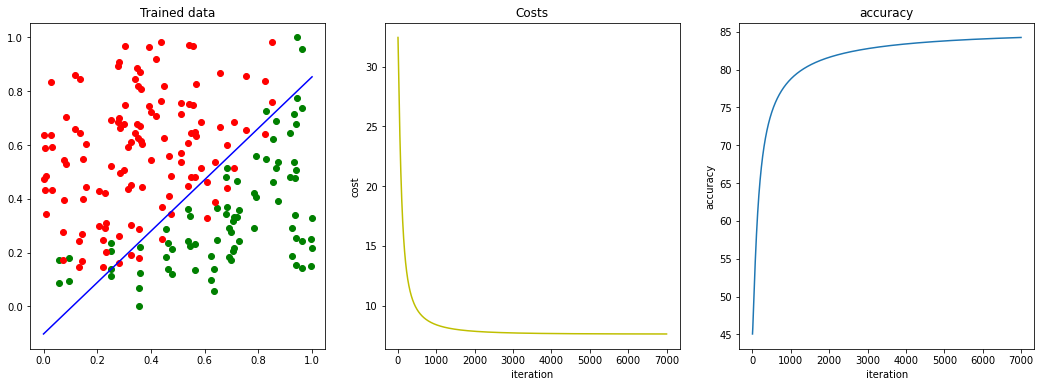

In [ ]:
# Q2_graded

# run the code and draw
# draw cost (loss) and trained chart

def normalize(x):
    Max = np.max(x)
    Min = np.min(x)
    normal = [(n - Min) / (Max - Min) for n in x]
    return normal

def main_q2():
    fi = open('/content/data.txt', 'r')
    lines = fi.readlines()
    fig = plt.figure(figsize=(18, 6))

    ax = fig.add_subplot(131)
    ax.title.set_text('Trained data')

    ax2 = fig.add_subplot(132)
    ax2.title.set_text('Costs')
    ax2.set_xlabel('iteration')
    ax2.set_ylabel('cost')
    

    ax3 = fig.add_subplot(133)
    ax3.title.set_text('accuracy')
    ax3.set_xlabel('iteration')
    ax3.set_ylabel('accuracy')

    x_in = [float(l.split(',')[0]) for l in lines]
    y_in = [float(l.split(',')[1]) for l in lines]
    x = normalize(x_in)
    y = normalize(y_in)
    x_training = np.array([x, y])
    o = [1.0 if float(i.split(',')[2]) == 1 else 0.0 for i in lines]
    y_out = np.array([o])

    color = ['red' if float(i.split(',')[2]) == 1 else 'green' for i in lines]
    for i in range(len(color)):
        ax.scatter(x[i], y[i], c=color[i])

    p = Perceptron_q2(x_training, y_out)

    p.train(x_training, y_out)
    print(f'weights : {p.weights} bias : {p.bias}')
    k = np.linspace(0, 1, 10)
    m = (p.weights[0][0] / p.weights[0][1])
    z = -(m * k + p.bias / p.weights[0][1])
    ax.plot(k, z, 'b')
    
    x = np.linspace(0,7000,7000)
    y = p.errs
    ax2.plot(x,y,'y')

    ax3.plot(p.accuracys)

    plt.show()

main_q2()

In [ ]:
# Q2_graded
# Do not change the above line.
# This cell is for your codes.

# Q4. MLP

In [ ]:
# Q4_graded
# Do not change the above line.

# This cell is for your imports.

from keras.layers import *
from keras.optimizers import *
from keras.models import Sequential
from keras.datasets import mnist
import numpy as np
import keras
import matplotlib.pyplot as plt

In [ ]:
# Q4_graded
# Do not change the above line.
#load data
# This cell is for your codes.

input_num = 28 *28
output_num = 10

(trainX, trainy), (testX, testy) = mnist.load_data()
x = trainX.reshape(trainX.shape[0],input_num)
x_test = testX.reshape(testX.shape[0],input_num)

## normalize x
X = x/255
X_test = x_test/255 
Y = keras.utils.to_categorical(trainy,output_num, np.float32)
Y_test = keras.utils.to_categorical(testy,output_num,np.float32)

print(X.shape)
print(X_test.shape)

print(Y.shape)
print(Y_test.shape)


(60000, 784)
(10000, 784)
(60000, 10)
(10000, 10)


In [ ]:
# Q4_graded
# Do not change the above line.
# create model
model = Sequential()
model.add(Dense(150, activation='relu',input_shape= (input_num,)))
model.add(Dense(30, activation='relu'))
model.add(Dense(output_num, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


# This cell is for your codes.

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 150)               117750    
_________________________________________________________________
dense_7 (Dense)              (None, 30)                4530      
_________________________________________________________________
dense_8 (Dense)              (None, 10)                310       
Total params: 122,590
Trainable params: 122,590
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Q4_graded

#train and test

#train
result = model.fit(x=X,y=Y,batch_size=500,epochs=20,validation_split=0.1)

#test
test_result = model.evaluate(x=X_test,y=Y_test,batch_size=30)


Epoch 1/20
108/108 [==============================] - 1s 9ms/step - loss: 1.0769 - accuracy: 0.6981 - val_loss: 0.2178 - val_accuracy: 0.9402
Epoch 2/20
108/108 [==============================] - 1s 7ms/step - loss: 0.2479 - accuracy: 0.9292 - val_loss: 0.1646 - val_accuracy: 0.9538
Epoch 3/20
108/108 [==============================] - 1s 7ms/step - loss: 0.1850 - accuracy: 0.9465 - val_loss: 0.1397 - val_accuracy: 0.9607
Epoch 4/20
108/108 [==============================] - 1s 7ms/step - loss: 0.1448 - accuracy: 0.9585 - val_loss: 0.1190 - val_accuracy: 0.9655
Epoch 5/20
108/108 [==============================] - 1s 8ms/step - loss: 0.1214 - accuracy: 0.9648 - val_loss: 0.1073 - val_accuracy: 0.9703
Epoch 6/20
108/108 [==============================] - 1s 8ms/step - loss: 0.1006 - accuracy: 0.9708 - val_loss: 0.0984 - val_accuracy: 0.9718
Epoch 7/20
108/108 [==============================] - 1s 8ms/step - loss: 0.0869 - accuracy: 0.9752 - val_loss: 0.0893 - val_accuracy: 0.9740
Epoch 

Accuracy : 0.9769999980926514 and Loss : 0.08088327199220657 


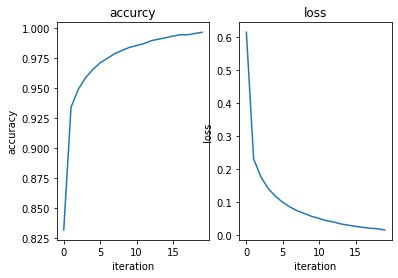

In [ ]:
# Q4_graded

# draw loss and accurcy

print(f'Accuracy : {test_result[1]} and Loss : {test_result[0]} ')
fig, (ax, err) = plt.subplots(1, 2)
ax.plot(result.history['accuracy'])
ax.title.set_text('accurcy')
ax.set_xlabel('iteration')
ax.set_ylabel('accuracy')

err.plot(result.history['loss'])
err.title.set_text('loss')
err.set_xlabel('iteration')
err.set_ylabel('loss')

plt.show()

# Q5. Back-Propagation

In [ ]:
# Q5_graded
# Do not change the above line.

# This cell is for your imports

from keras.layers import *
from keras.optimizers import *
from keras.models import Sequential
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
import keras

In [ ]:
# Q5_graded
# Do not change the above line.
## LOAD DATA


(trainX, trainy), (testX, testy) = mnist.load_data()
X = trainX.reshape(trainX.shape[0],28*28)
X_test = testX.reshape(testX.shape[0],28*28)
Y = keras.utils.to_categorical(trainy,10,np.float32)
Y_test = keras.utils.to_categorical(testy,10,np.float32)

x_train_q5_tmp = X.T
x_train_q5 = x_train_q5_tmp / 255

x_test_q5_tmp = X_test.T
x_test_q5 = x_test_q5_tmp / 255


y_train_q5 = Y.T
y_test_q5 = Y_test.T

print(x_train_q5.shape)
print(y_train_q5.shape)

# This cell is for your codes.s

(784, 60000)
(10, 60000)


In [ ]:
# Q5_graded

# Nerual Network class

class NN():
    def __init__(self, layer_dim, l_rate=0.2, iteration=100):
      self.params = {}
      self.costs = []
      self.accuracys = []
      self.l_rate = l_rate
      self.iteration = iteration
      for i in range(1, len(layer_dim)):
        self.params['W' + str(i)] = np.random.randn(layer_dim[i], layer_dim[i - 1]) * 0.01
        self.params['b' + str(i)] = np.zeros((layer_dim[i], 1)) * 0.01

    def relu(self,z):
      return (np.maximum(0, z), z)

    def relu_retrieve(self, dA, cache):
      z = cache
      dz = np.array(dA, copy=True)
      dz[z <= 0] = 0
      return dz

    def softmax(self, z):
      z = z - np.max(z, axis=0, keepdims=True)
      A = np.exp(z) / np.sum(np.exp(z), axis=0, keepdims=True)
      return (A, z)

    def softmax_retrieve(self, dA, cache):
      z = cache
      soft_out, cache = self.softmax(z)
      dz = dA * soft_out * (1 - soft_out)
      return dz

    def linear_forward(self, A, W, b):
        z = np.dot(W, A) + b
        return (z, (A, W, b))

    # compute the activation of linear_forward
    def linear_activation_forward(self, A, W, b, activation):
        z, linear_cache = self.linear_forward(A, W, b)

        if activation == 'softmax':
            A, activation_cache = self.softmax(z)
            cache = (linear_cache, activation_cache)
            return A, cache
        elif activation == 'relu':
            A, activation_cache = self.relu(z)
            cache = (linear_cache, activation_cache)
            return (A, cache)

    def forward_propagate(self, X):
        L = len(self.params) // 2
        caches = []

        # for layer 0 - > L-1
        A = X

        for i in range(1, L):
            W = self.params['W' + str(i)]
            b = self.params['b' + str(i)]
            A, cache = self.linear_activation_forward(A, W, b, 'relu')
            caches.append(cache)

        # last layer : Al --> last A
        Al, cache = self.linear_activation_forward(A, self.params['W' + str(L)], self.params['b' + str(L)], 'softmax')
        
        caches.append(cache)
        return (Al, caches)

    def linear_backward(self, dz, cache):
        A_pre, W, b = cache
        m = A_pre.shape[1]
        dA_prev = np.dot(W.T, dz)
        dW = np.dot(dz, A_pre.T) / m
        db = np.sum(dz, axis=1, keepdims=True) / m
        return (dA_prev, dW, db)

    def back_propagate(self, Al, Y, caches):
        L = len(caches)
        grads = {}

        ## out put layer back prop
        dAl = - (np.divide(Y, Al) - np.divide(1 - Y, 1 - Al))
        linear_cache, active_cache = caches[-1]
        dz = self.softmax_retrieve(dAl, active_cache)
        tmp = self.linear_backward(dz, linear_cache)
        grads["dA" + str(L)] = tmp[0]
        grads["dW" + str(L)] = tmp[1]
        grads["db" + str(L)] = tmp[2]

        # other hidden layers back prop
        for i in reversed(range(L-1)):
            linear_cache, active_cache = caches[i]
            dA = grads["dA" + str(i + 2)]
            dz = self.relu_retrieve(dA, active_cache)
            tmp = self.linear_backward(dz, linear_cache)
            grads["dA" + str(i + 1)] = tmp[0]
            grads["dW" + str(i + 1)] = tmp[1]
            grads["db" + str(i + 1)] = tmp[2]

        return grads

    # update weights and bias 
    def update(self, gradients):
        L = len(self.params) // 2
        for i in range(L):
            weight_i = 'W' + str(i+1)
            bias_i = 'b' + str(i+1)
            dW = gradients['dW' + str(i+1)]
            self.params[weight_i] -=(self.l_rate * dW)
            db = gradients['db' + str(i+1)]
            self.params[bias_i] -= (self.l_rate * db)

    def train(self, X, Y):
        for i in range(self.iteration):
            Al, all_caches = self.forward_propagate(X)
            self.compute_cost(Al, Y)
            self.compute_accuracy(Al, Y)
            gradients = self.back_propagate(Al, Y, all_caches)
            self.update(gradients)
            if (i % 10 == 0 or i == self.iteration - 1):
              print(f'Iteration  ===>   {i}/{self.iteration}   cost :  {self.costs[-1]},   accuracy {self.accuracys[-1]}')

    def compute_cost(self,Al, Y):
      samples = Y.shape[1]
      loss = -1 * (Y * np.log(Al) + (1 - Y) * np.log(1 - Al))
      cost = np.sum(loss) / samples
      self.costs.append(cost)

    def compute_accuracy(self,Al, Y):
      samples = Y.shape[1]
      max_index_predict = np.argmax(Al,axis=0)
      max_index_Y_label = np.argmax(Y, axis=0)
      equal_indexs = (max_index_predict == max_index_Y_label)
      sum_all_equal_index = np.sum(equal_indexs)
      accuracy = sum_all_equal_index / samples
      self.accuracys.append(accuracy)


(784, 60000)
(10, 60000)
Iteration  ===>   0/200   cost :  3.2494331350064267,   accuracy 0.19361666666666666
Iteration  ===>   10/200   cost :  3.2104728043929414,   accuracy 0.5655166666666667
Iteration  ===>   20/200   cost :  3.0487848481177426,   accuracy 0.6001666666666666
Iteration  ===>   30/200   cost :  2.578215873640894,   accuracy 0.6785
Iteration  ===>   40/200   cost :  1.9798364345173027,   accuracy 0.7247166666666667
Iteration  ===>   50/200   cost :  1.5562934074768167,   accuracy 0.7798833333333334
Iteration  ===>   60/200   cost :  1.292619784990949,   accuracy 0.8116666666666666
Iteration  ===>   70/200   cost :  1.122988017872437,   accuracy 0.8319833333333333
Iteration  ===>   80/200   cost :  1.007274061752069,   accuracy 0.8471333333333333
Iteration  ===>   90/200   cost :  0.9237527798803686,   accuracy 0.8584333333333334
Iteration  ===>   100/200   cost :  0.8606190710292118,   accuracy 0.86705
Iteration  ===>   110/200   cost :  0.8112198188729214,   accuracy

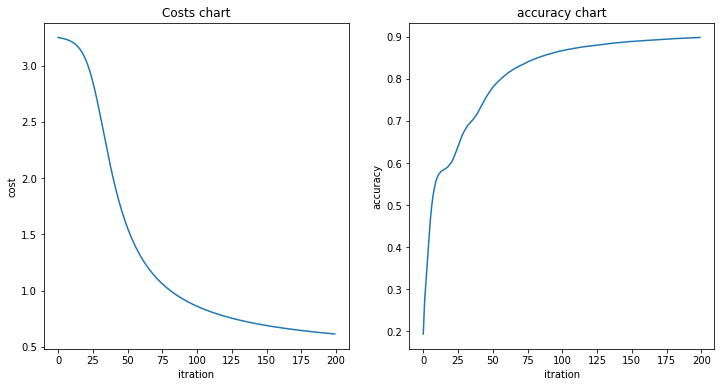

In [ ]:
# Q5_graded
# run the program

neroun_in_hidden_layer = 120

n = NN([x_train_q5.shape[0], neroun_in_hidden_layer, y_train_q5.shape[0]],iteration=200)
print(x_train_q5.shape)
print(y_train_q5.shape)
n.train(x_train_q5, y_train_q5)

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(121)
ax.title.set_text('Costs chart')
ax.set_xlabel('itration')
ax.set_ylabel('cost')
ax.plot(n.costs)

ax2 = fig.add_subplot(122)
ax2.title.set_text('accuracy chart')
ax2.set_xlabel('itration')
ax2.set_ylabel('accuracy')
ax2.plot(n.accuracys)

plt.show()


In [ ]:
# Q5_graded
# run the program
# evaluate model

Al_test, caches = n.forward_propagate(x_test_q5)
n.compute_accuracy(Al_test, y_test_q5)
n.compute_cost(Al_test, y_test_q5)
print(f'accuracy : {n.accuracys[-1]}')
print(f'cost : {n.costs[-1]}')



accuracy : 0.9022
cost : 0.5869670804685854



# <font color='red'>Submission</font>

1. Sign up in [Gradescope](https://www.gradescope.com) with proper name and student ID and use the following code to join the class: <font color='red'>**D5372R**</font>
2. Fill in your full name (seperated by single spaces) and student ID in the beginning of this notebook.
3. After you're done with this notebook, you should do the following:
  - Clear all outputs of the notebook.
  ![clear all outputs](https://i.ibb.co/y6FrttB/Screen-Shot-2021-03-21-at-01-51-42.png)
  - Run all of the cells (if you skipped a question just leave the cell unchanged), and make sure all of your outputs are correct.
  ![run all](https://i.ibb.co/cgRcBZ0/Screen-Shot-2021-03-21-at-01-54-58.png)
  - Save your notebook.
  
  - If you're using Colab, download your notebook.
  ![download ipynb](https://i.ibb.co/2KxYM6K/Screen-Shot-2021-03-21-at-02-03-50.png)
  
  - Put the notebook file you just downloaded and `convert.py` in the same folder run the following command:
  ```bash
  python convert.py
  ```
  This will export your code for each question into a `.py` file.
    - **Note**: if you want to add more cells, add this to the **first** line of the cell:
  ```python
  # Q5_graded
  ```
  according to the question number.
  - There are 2 assignments in Gradescope:

    ![assignments](https://i.ibb.co/10GMhGM/Screen-Shot-2021-03-21-at-02-16-25.png)
  
    You should upload your **codes** and your **notebook** in `HW1` section and your final report for all of the questions as a **single pdf** file in `HW1 - Report`. Autograder will automatically check for:
    - `CI992_HW1.ipynb`
    - `Q1.py`
    - `Q2.py`
    - `Q4.py`
    - `Q5.py`
    - Your name and ID in the beginning of `.ipynb` file.

    It is important that you <font color='red'>**don't**</font> change the names of these files before submission.

4. If you pass the autograder, you're good to go.